### 국내 시가총액 상위 10개 종목의 2024년도 주가 추이 비교하기

In [149]:
# 데이터 분석을 위한 패키지
import numpy as np
import pandas as pd

In [150]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
import koreanize_matplotlib

In [152]:
# 모든 컬럼,행을 출력하도록 설정
pd.set_option('display.max_columns', None) # None으로 설정하면 모든 컬럼 출력
pd.set_option('display.max_rows', 50) #None으로 설정하면 모든 행 출력

In [153]:
pd.options.display.float_format = '{:,.2f}'.format

In [154]:
import FinanceDataReader as fdr

개별종목 시세 가져오기

#### 1) 종목 정보 가져오기

종목코드, 종목명, 시가총액 정보 가져오기

In [155]:
#CSV 파일 불러오기
df_stocks = pd.read_csv('stocks.csv')

In [156]:
df_stocks.shape

(2855, 23)

In [157]:
df_stocks.columns

Index(['Code', 'Name', 'Market', 'Dept', 'Close', 'ChangeCode', 'Changes',
       'ChagesRatio', 'Open', 'High', 'Low', 'Volume', 'Amount', 'Marcap',
       'Stocks', 'MarketId', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [158]:
df_stocks.head(1)

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,005930,삼성전자,KOSPI,NaN,53900,1,500,0.94,54500,54500,53700,16788212,906959515200,321771279445000,5969782550,STK,통신 및 방송 장비 제조업,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조(...",1975-06-11,12월,한종희,http://www.samsung.com/sec,경기도


In [159]:
# 상장일을 문자타입 -> 날짜타입
df_stocks['ListingDate'] = pd.to_datetime(df_stocks['ListingDate'])

In [160]:
# 타입 바뀌었는지 확인
df_stocks['ListingDate'].dtype
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2855 entries, 0 to 2854
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Code            2855 non-null   object        
 1   Name            2855 non-null   object        
 2   Market          2855 non-null   object        
 3   Dept            1896 non-null   object        
 4   Close           2855 non-null   int64         
 5   ChangeCode      2855 non-null   int64         
 6   Changes         2855 non-null   int64         
 7   ChagesRatio     2855 non-null   float64       
 8   Open            2855 non-null   int64         
 9   High            2855 non-null   int64         
 10  Low             2855 non-null   int64         
 11  Volume          2855 non-null   int64         
 12  Amount          2855 non-null   int64         
 13  Marcap          2855 non-null   int64         
 14  Stocks          2855 non-null   int64         
 15  Mark

In [161]:
# 날짜 정보 확인
# df_stocks['ListingDate'].dt.dayofweek      # 0(월)~6(일)
# df_stocks['ListingDate'].dt.year           # 년
# df_stocks['ListingDate'].dt.month          # 월
# df_stocks['ListingDate'].dt.day            # 일

In [162]:
# 시가총액 상위 10개종목의 코드
top10_codes = df_stocks.sort_values(by='Marcap', ascending=False).head(10)[['Code','Name']]

In [163]:
top10_codes 

,Code,Name
0,005930,삼성전자
1,000660,SK하이닉스
2,373220,LG에너지솔루션
3,207940,삼성바이오로직스
4,005380,현대차
5,068270,셀트리온
6,000270,기아
7,005935,삼성전자우
8,105560,KB금융
9,035420,NAVER


In [164]:
top10_codes.values

array([['005930', '삼성전자'],
       ['000660', 'SK하이닉스'],
       ['373220', 'LG에너지솔루션'],
       ['207940', '삼성바이오로직스'],
       ['005380', '현대차'],
       ['068270', '셀트리온'],
       ['000270', '기아'],
       ['005935', '삼성전자우'],
       ['105560', 'KB금융'],
       ['035420', 'NAVER']], dtype=object)

In [165]:
# tolist() : numpy array => list
top10_codes.values.tolist()

[['005930', '삼성전자'],
 ['000660', 'SK하이닉스'],
 ['373220', 'LG에너지솔루션'],
 ['207940', '삼성바이오로직스'],
 ['005380', '현대차'],
 ['068270', '셀트리온'],
 ['000270', '기아'],
 ['005935', '삼성전자우'],
 ['105560', 'KB금융'],
 ['035420', 'NAVER']]

##### zip() 함수
zip() 함수는 파이썬에서 여러 iterable(반복 가능한 객체)을 동시에 순회할 수 있도록 해주는 내장 함수입니다. 
주로 두 개 이상의 리스트나 튜플을 묶어서 각 요소를 쌍으로 만들 때 사용됩니다.

- 두 개의 리스트 생성
list1 = [1, 2, 3]
list2 = ['a', 'b', 'c']

- zip() 사용
zipped = zip(list1, list2)

- 결과를 리스트로 변환하여 출력
result = list(zipped)
print(result)

출력 결과
[(1, 'a'), (2, 'b'), (3, 'c')]

In [166]:
# 2차원 numpy 배열 => 딕셔너리로 변환 
# case1) 리스트 컴프리헨션 => 딕셔너리
# dict_top10_codes = { ele[0] : ele[1] for ele in top10_codes.values }

# case2) zip : iterable 객체의 동일 인덱스에 있는 요소들을 묶어서 튜플로 반환
# arr1, arr2 = top10_codes.values[:,0], top10_codes.values[:,1]
# dict_top10_codes = dict(zip(arr1,arr2))

# case3) tolist : numpy의 ndarray => python list로 변환
dict_top10_codes = dict(top10_codes.values.tolist())

In [167]:
dict_top10_codes

{'005930': '삼성전자',
 '000660': 'SK하이닉스',
 '373220': 'LG에너지솔루션',
 '207940': '삼성바이오로직스',
 '005380': '현대차',
 '068270': '셀트리온',
 '000270': '기아',
 '005935': '삼성전자우',
 '105560': 'KB금융',
 '035420': 'NAVER'}

#### 2) 종목 시세 가져오기

In [168]:
# fdr.DataReader('005930','2024')

시가총액 상위 10개 종목의 이름을 키로 종가추이를 값으로 하는 딕셔너리 생성

In [169]:
# enumerate : 순서(idx), 와 value

item_dict = {}
for key, value in dict_top10_codes.items() : 
    item_dict[value] = fdr.DataReader(key,'2024')['Close']

print(len(item_dict))
    # print(idx, code)

10


In [170]:
item_dict['NAVER']

Date
2024-01-02    227500
2024-01-03    222000
2024-01-04    223000
2024-01-05    220500
2024-01-08    226500
               ...  
2024-12-04    202500
2024-12-05    204000
2024-12-06    204500
2024-12-09    201500
2024-12-10    209000
Name: Close, Length: 231, dtype: int64

In [171]:
item_dict

{'삼성전자': Date
 2024-01-02    79600
 2024-01-03    77000
 2024-01-04    76600
 2024-01-05    76600
 2024-01-08    76500
               ...  
 2024-12-04    53100
 2024-12-05    53700
 2024-12-06    54100
 2024-12-09    53400
 2024-12-10    54000
 Name: Close, Length: 231, dtype: int64,
 'SK하이닉스': Date
 2024-01-02    142400
 2024-01-03    136800
 2024-01-04    136400
 2024-01-05    137500
 2024-01-08    136000
                ...  
 2024-12-04    168000
 2024-12-05    173000
 2024-12-06    167100
 2024-12-09    168900
 2024-12-10    170400
 Name: Close, Length: 231, dtype: int64,
 'LG에너지솔루션': Date
 2024-01-02    429500
 2024-01-03    416000
 2024-01-04    419000
 2024-01-05    416000
 2024-01-08    415000
                ...  
 2024-12-04    389000
 2024-12-05    382000
 2024-12-06    390500
 2024-12-09    387500
 2024-12-10    385000
 Name: Close, Length: 231, dtype: int64,
 '삼성바이오로직스': Date
 2024-01-02    789000
 2024-01-03    787000
 2024-01-04    770000
 2024-01-05    756000
 2024-01

#### 3) 종목 정보 병합하기

In [172]:
# case1)
df = pd.DataFrame(item_dict)
df

,삼성전자,SK하이닉스,LG에너지솔루션,삼성바이오로직스,현대차,셀트리온,기아,삼성전자우,KB금융,NAVER
Date,,,,,,,,,,
2024-01-02,79600,142400,429500,789000,200500,231500,97600,63000,53600,227500
2024-01-03,77000,136800,416000,787000,193800,231500,93800,61200,52600,222000
2024-01-04,76600,136400,419000,770000,190000,218000,92900,61700,51700,223000
2024-01-05,76600,137500,416000,756000,187300,214500,91600,61700,51300,220500
2024-01-08,76500,136000,415000,749000,185700,206000,88900,61800,52200,226500
...,...,...,...,...,...,...,...,...,...,...
2024-12-04,53100,168000,389000,961000,209000,183000,98100,45350,95400,202500
2024-12-05,53700,173000,382000,964000,204500,181000,94000,45550,85800,204000
2024-12-06,54100,167100,390500,962000,203500,180100,94800,45500,85300,204500


In [173]:
# case2)
# 종목의 종가를 열축으로 병합하기
df = pd.concat(item_dict.values(),axis=1)
# 컬럼명 수정
df = df.set_axis(dict_top10_codes.values(),axis=1)
df

,삼성전자,SK하이닉스,LG에너지솔루션,삼성바이오로직스,현대차,셀트리온,기아,삼성전자우,KB금융,NAVER
Date,,,,,,,,,,
2024-01-02,79600,142400,429500,789000,200500,231500,97600,63000,53600,227500
2024-01-03,77000,136800,416000,787000,193800,231500,93800,61200,52600,222000
2024-01-04,76600,136400,419000,770000,190000,218000,92900,61700,51700,223000
2024-01-05,76600,137500,416000,756000,187300,214500,91600,61700,51300,220500
2024-01-08,76500,136000,415000,749000,185700,206000,88900,61800,52200,226500
...,...,...,...,...,...,...,...,...,...,...
2024-12-04,53100,168000,389000,961000,209000,183000,98100,45350,95400,202500
2024-12-05,53700,173000,382000,964000,204500,181000,94000,45550,85800,204000
2024-12-06,54100,167100,390500,962000,203500,180100,94800,45500,85300,204500


#### 4) 종목의 시세 추이 분석(line차트)

<Axes: xlabel='Date'>

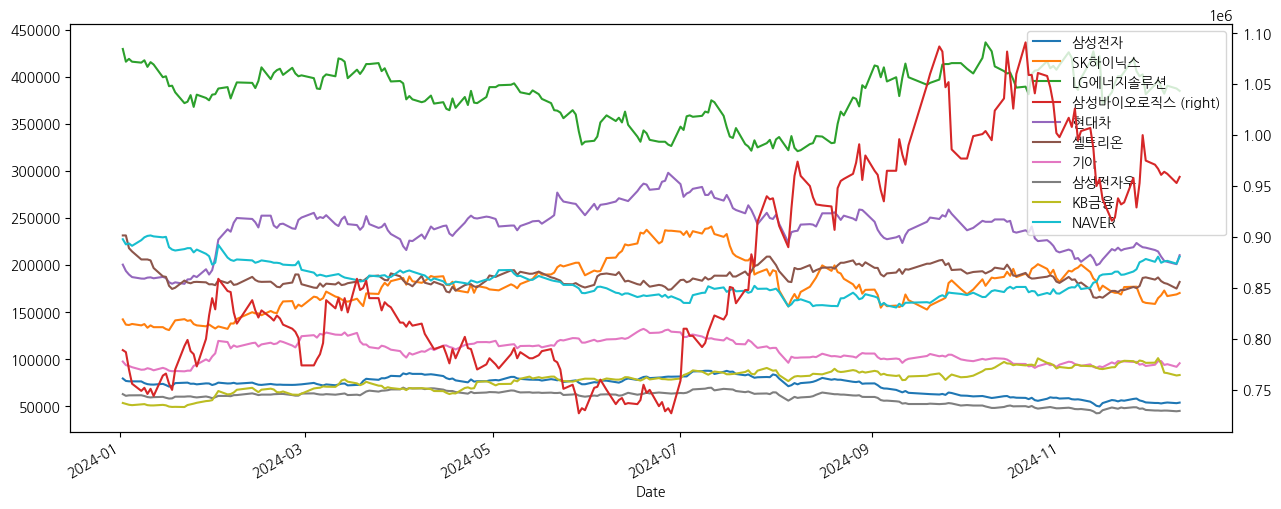

In [174]:
df.plot(figsize=(15,6), secondary_y='삼성바이오로직스')
# df[['삼성전자','SK하이닉스']].plot(figsize=(15,6), secondary_y='삼성바이오로직스')

### 국내 시가총액 상위 10종목의 2024년도 수익률 비교하기

In [185]:
df['삼성전자']

Date
2024-01-02    79600
2024-01-03    77000
2024-01-04    76600
2024-01-05    76600
2024-01-08    76500
              ...  
2024-12-04    53100
2024-12-05    53700
2024-12-06    54100
2024-12-09    53400
2024-12-10    54000
Name: 삼성전자, Length: 231, dtype: int64

In [186]:
df['삼성전자'] / df['삼성전자'].iloc[0] - 1

Date
2024-01-02    0.00
2024-01-03   -0.03
2024-01-04   -0.04
2024-01-05   -0.04
2024-01-08   -0.04
              ... 
2024-12-04   -0.33
2024-12-05   -0.33
2024-12-06   -0.32
2024-12-09   -0.33
2024-12-10   -0.32
Name: 삼성전자, Length: 231, dtype: float64

In [ ]:
(df['삼성전자'] / df['삼성전자'].iloc[0] - 1)

In [189]:
# 2024년 1월 2일 기준 현시점 수익률
((df / df.iloc[0] - 1).iloc[-1].sort_values(ascending=False)*100).round(2) 

KB금융        55.41
삼성바이오로직스    21.55
SK하이닉스      19.66
현대차          4.99
기아          -1.84
NAVER       -8.13
LG에너지솔루션   -10.36
셀트리온       -21.34
삼성전자우      -28.25
삼성전자       -32.16
Name: 2024-12-10 00:00:00, dtype: float64

In [191]:
tmp = (df / df.iloc[0] - 1).iloc[-1].sort_values(ascending=False)

In [194]:
tmp.map(lambda x : f'{(x * 100) : .2f}%')

KB금융         55.41%
삼성바이오로직스     21.55%
SK하이닉스       19.66%
현대차           4.99%
기아           -1.84%
NAVER        -8.13%
LG에너지솔루션    -10.36%
셀트리온        -21.34%
삼성전자우       -28.25%
삼성전자        -32.16%
Name: 2024-12-10 00:00:00, dtype: object

In [ ]:
# pd.options.display.float_format : pandas 라이브러리에서 출력되는 부동소수점 숫자의 형식을 설정하는 옵션
# pd.options.display.float_format = '{:,.2f}'.format

종목, 매수일, 매도일 => 수익율, 수익금액

In [197]:
tmp2 = df / df.iloc[0] - 1

<Axes: xlabel='Date'>

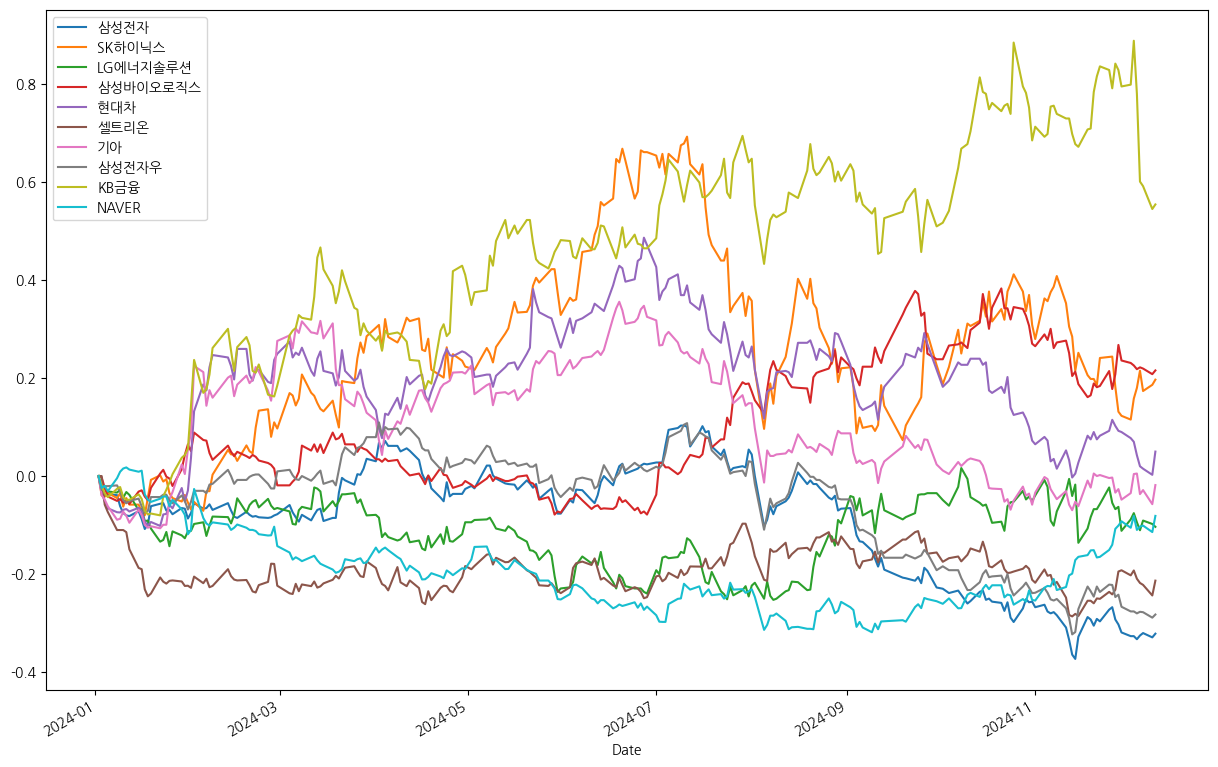

In [200]:
tmp2.plot(figsize=(15,10))

<Axes: xlabel='Date'>

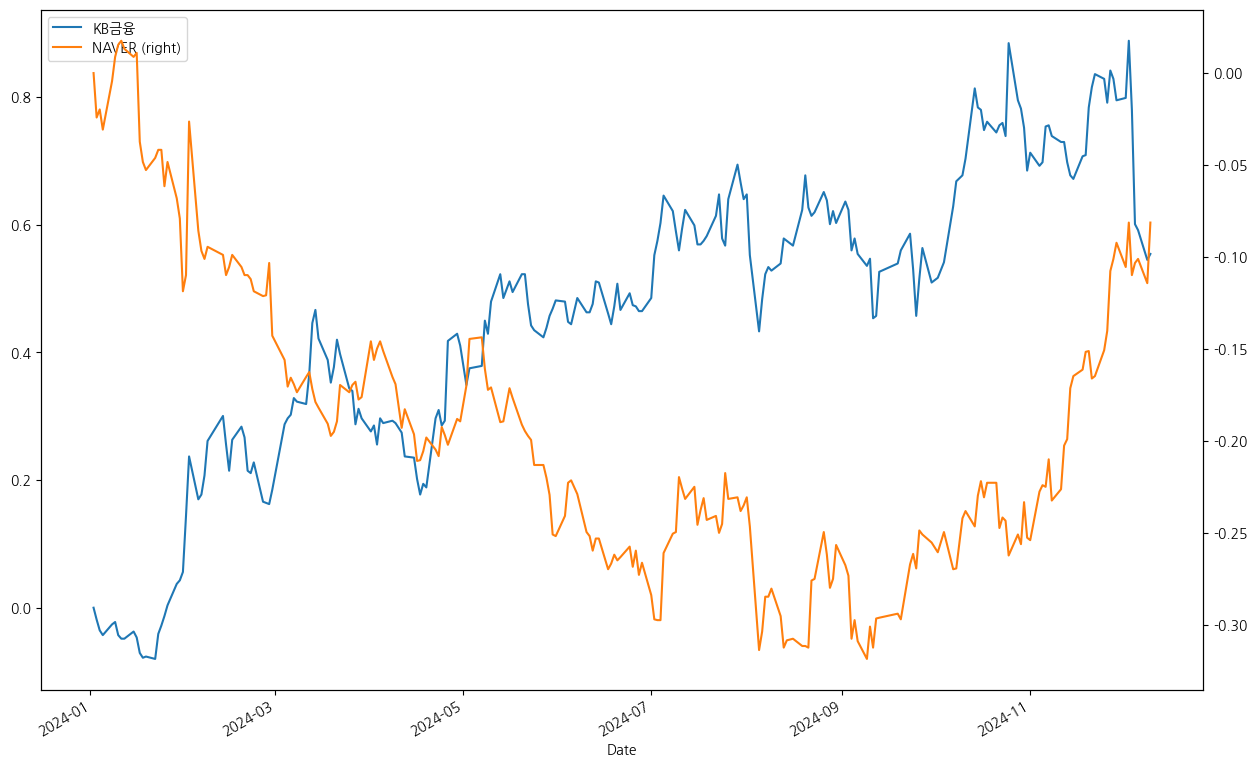

In [202]:
tmp2[['KB금융','NAVER']].plot(figsize=(15,10), secondary_y='NAVER')